In [72]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

In [73]:
# from google.colab import drive
# drive.mount('/content/drive')

In [74]:
dataset = pd.read_excel('Dataset UAS.xlsx', sheet_name = 'Produktivitas')

In [75]:
def visualize_silhouette(X,cluster_labels):
    n_clusters = len(np.unique(cluster_labels))

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_cluster = ", n_clusters, "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10

    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

In [76]:
dataset.columns = dataset.columns.astype(str)
dataset = dataset.drop(columns=['No', 'Nama Kota'])
dataset_filled = dataset.fillna(dataset.mean(numeric_only=True))

In [77]:
print(dataset.dtypes)

2010      int64
2011      int64
2012      int64
2013      int64
2014      int64
2015      int64
2016      int64
2017      int64
2018    float64
2019    float64
2020    float64
2021    float64
2022    float64
2023      int64
2024      int64
dtype: object


For n_cluster =  2 The average silhouette_score is : 0.31626619974187303


c:\Users\darre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\darre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


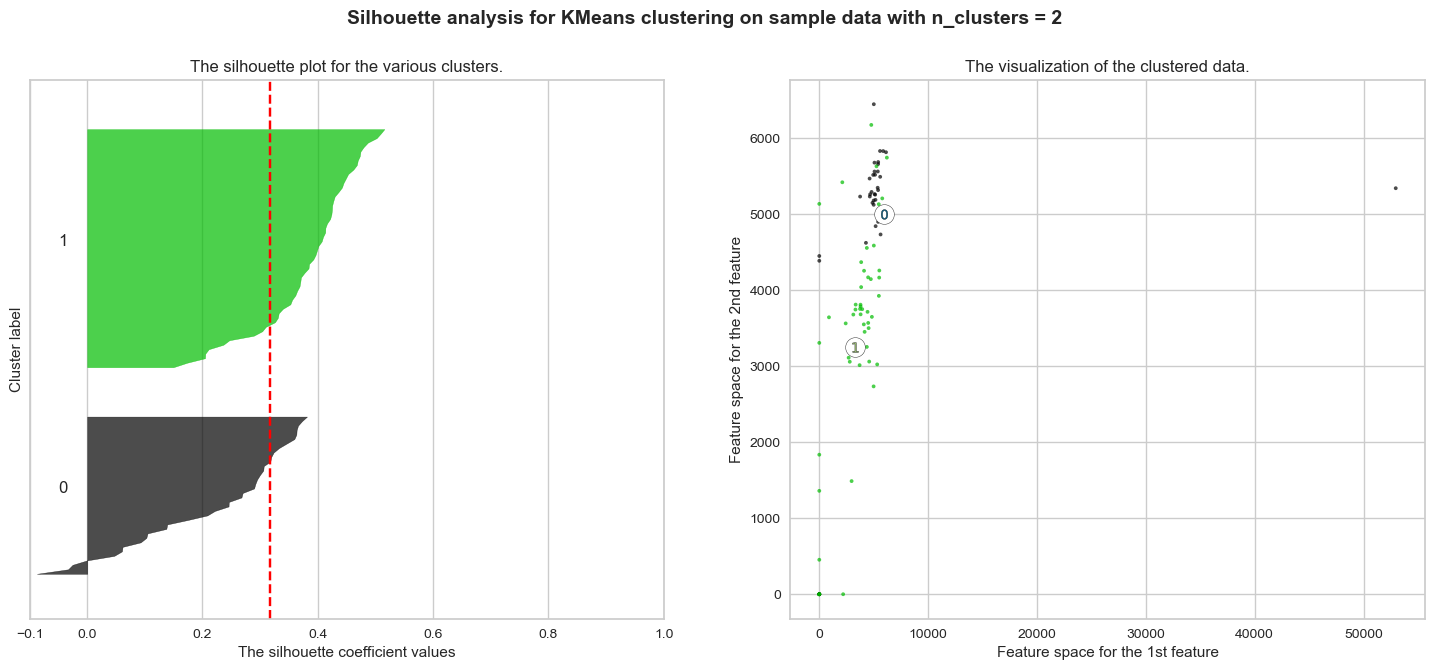

In [78]:
clusterer = KMeans(n_clusters=2, random_state=5)
cluster_labels = clusterer.fit_predict(dataset)
silhouette_avg = silhouette_score(dataset, cluster_labels)
visualize_silhouette(dataset.values,cluster_labels)

In [79]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluasi Silhouette Score
silhouette_avg = silhouette_score(dataset, cluster_labels)
print("Silhouette Score:", silhouette_avg)

# Evaluasi Davies-Bouldin Index
db_index = davies_bouldin_score(dataset, cluster_labels)
print("Davies-Bouldin Index:", db_index)


Silhouette Score: 0.8160774778332576
Davies-Bouldin Index: 0.12176819782469642


In [80]:
sample_silhouette_values = silhouette_samples(dataset, cluster_labels)
sample_silhouette_values

array([0.83061209, 0.85192931, 0.7123584 , 0.83500854, 0.84568846,
       0.8140068 , 0.86113437, 0.78745203, 0.84617307, 0.78318261,
       0.85897266, 0.86594773, 0.85870366, 0.8361541 , 0.85652571,
       0.85637459, 0.73241732, 0.84883881, 0.86013159, 0.81379608,
       0.83849047, 0.84922547, 0.81779976, 0.85106933, 0.87016635,
       0.86850437, 0.85929556, 0.85028799, 0.87223875, 0.83961941,
       0.86019616, 0.87476066, 0.86369848, 0.86129305, 0.85978541,
       0.76798177, 0.86386783, 0.84238383, 0.86659053, 0.86659397,
       0.86605426, 0.87059346, 0.85959021, 0.85340964, 0.7922461 ,
       0.85920139, 0.86042138, 0.81540184, 0.83437549, 0.8396275 ,
       0.84210856, 0.83852086, 0.84203762, 0.82848577, 0.84830926,
       0.85441742, 0.81814844, 0.82452027, 0.8591709 , 0.83076239,
       0.84039467, 0.84812195, 0.83403629, 0.83881354, 0.83780784,
       0.82294256, 0.85361325, 0.83217235, 0.84685481, 0.81241007,
       0.78934652, 0.83699721, 0.85490512, 0.33518041, 0.71417

c:\Users\darre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


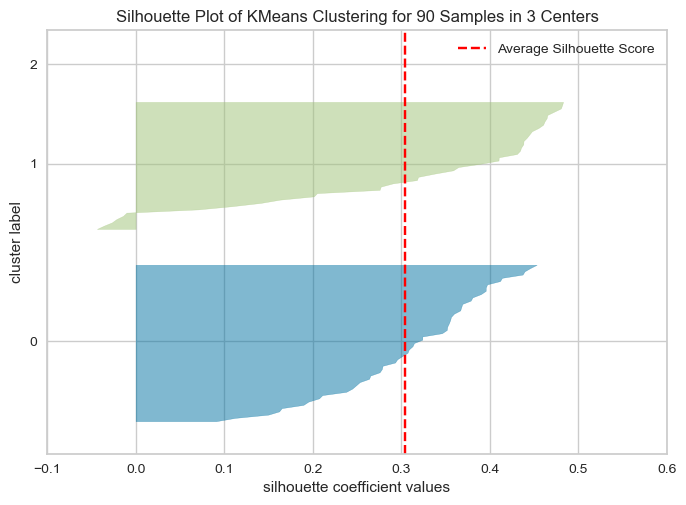

For n_cluster = 3  3 The average silhouette_score is : 0.3037045173117961


c:\Users\darre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [81]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

clusterer = KMeans(n_clusters=3, random_state=5)
visualizer = SilhouetteVisualizer(clusterer, colors='yellowbrick')


visualizer.fit(dataset)
visualizer.show()

cluster_labels = clusterer.fit_predict(dataset)
silhouette_avg = silhouette_score(dataset, cluster_labels)
print("For n_cluster = 3 ",3, "The average silhouette_score is :", silhouette_avg)

Cluster 1

In [82]:
# Menambahkan kolom label cluster ke dataset
dataset['cluster_label'] = cluster_labels

# Membuat grup untuk cluster 1
Group1 = dataset[dataset['cluster_label'] == 0]

# Menghapus kolom yang tidak diperlukan
Group1 = Group1.drop(columns=['cluster_label'])

# Menampilkan statistik deskriptif
Group1.describe()


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.00000,49.0
mean,3099.693878,3125.081633,3819.857143,3661.040816,3607.653061,3882.142857,3460.122449,3025.755102,3630.967143,3239.269796,2898.887959,3677.844286,2991.410204,2839.44898,0.0
std,1942.467055,1637.752358,1526.222174,1302.035233,1282.954233,1609.975556,1251.990043,1364.120344,1576.845196,1549.459362,1280.357312,1462.205983,1586.876064,1647.73247,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
25%,2116.000000,3011.000000,3554.000000,3413.000000,3302.000000,3391.000000,3002.000000,2398.000000,3215.510000,2377.560000,2577.880000,3254.300000,2022.900000,2451.00000,0.0
50%,3795.000000,3560.000000,4443.000000,3973.000000,3803.000000,3900.000000,3566.000000,3427.000000,4014.070000,3626.440000,3135.270000,3686.410000,3437.800000,3341.00000,0.0
75%,4494.000000,4037.000000,4699.000000,4273.000000,4016.000000,4461.000000,4077.000000,4028.000000,4637.770000,4335.810000,3770.530000,4566.070000,4006.200000,3917.00000,0.0
max,6208.000000,6169.000000,5649.000000,6177.000000,6600.000000,9228.000000,5506.000000,4965.000000,6830.390000,6344.160000,5212.800000,6835.390000,5872.400000,6166.00000,0.0


Cluster 2

In [83]:
# Menambahkan kolom label cluster ke dataset
dataset['cluster_label'] = cluster_labels

# Membuat grup untuk cluster 2
Group2 = dataset[dataset['cluster_label'] == 1]

# Menghapus kolom yang tidak diperlukan
Group2 = Group2.drop(columns=['cluster_label'])

# Menampilkan statistik deskriptif
Group2.describe()


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
count,40.000000,40.000000,40.00000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0000,40.000000,40.0
mean,4598.225000,4928.700000,7683.07500,5501.65000,5493.600000,5691.600000,5086.325000,5364.325000,5505.203250,5755.221250,5333.970750,5281.719000,5220.5700,4550.700000,0.0
std,1624.495417,1267.667254,6545.47155,993.45849,861.692812,789.207613,1158.206048,857.877356,681.935225,808.443537,520.636827,1335.403217,1313.2337,1639.376307,0.0
min,0.000000,0.000000,872.00000,3262.00000,3732.000000,4017.000000,0.000000,2518.000000,3062.410000,4159.320000,3731.440000,0.000000,0.0000,0.000000,0.0
25%,4664.250000,4880.750000,5241.75000,4788.75000,4907.250000,5064.750000,4745.000000,4899.000000,5217.632500,5220.610000,5177.412500,5271.522500,5231.4000,4687.000000,0.0
50%,5101.500000,5240.000000,6030.50000,5530.50000,5670.500000,5715.500000,5230.500000,5305.000000,5529.575000,5694.425000,5380.585000,5544.135000,5523.1500,5088.500000,0.0
75%,5403.750000,5524.500000,7457.00000,6268.25000,6114.250000,6251.750000,5697.750000,6159.750000,5823.620000,6165.222500,5537.410000,5816.670000,5732.8500,5243.500000,0.0
max,6129.000000,6441.000000,43626.00000,7169.00000,7134.000000,7505.000000,7050.000000,6754.000000,7024.440000,8920.360000,6608.900000,6911.010000,6600.7000,6419.000000,0.0


Cluster 3

In [84]:
# Menambahkan kolom label cluster ke dataset
dataset['cluster_label'] = cluster_labels

# Membuat grup untuk cluster 3
Group3 = dataset[dataset['cluster_label'] == 2]

# Menghapus kolom yang tidak diperlukan
Group3 = Group3.drop(columns=['cluster_label'])

# Menampilkan statistik deskriptif
Group3.describe()


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.0,1.0,1.0
mean,52960.0,5337.0,17404.0,6720.0,5678.0,5696.0,4688.0,5552.0,5428.7,5363.91,5287.85,5464.79,5358.4,6948.0,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,52960.0,5337.0,17404.0,6720.0,5678.0,5696.0,4688.0,5552.0,5428.7,5363.91,5287.85,5464.79,5358.4,6948.0,0.0
25%,52960.0,5337.0,17404.0,6720.0,5678.0,5696.0,4688.0,5552.0,5428.7,5363.91,5287.85,5464.79,5358.4,6948.0,0.0
50%,52960.0,5337.0,17404.0,6720.0,5678.0,5696.0,4688.0,5552.0,5428.7,5363.91,5287.85,5464.79,5358.4,6948.0,0.0
75%,52960.0,5337.0,17404.0,6720.0,5678.0,5696.0,4688.0,5552.0,5428.7,5363.91,5287.85,5464.79,5358.4,6948.0,0.0
max,52960.0,5337.0,17404.0,6720.0,5678.0,5696.0,4688.0,5552.0,5428.7,5363.91,5287.85,5464.79,5358.4,6948.0,0.0


In [85]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   2010           90 non-null     int64  
 1   2011           90 non-null     int64  
 2   2012           90 non-null     int64  
 3   2013           90 non-null     int64  
 4   2014           90 non-null     int64  
 5   2015           90 non-null     int64  
 6   2016           90 non-null     int64  
 7   2017           90 non-null     int64  
 8   2018           90 non-null     float64
 9   2019           90 non-null     float64
 10  2020           90 non-null     float64
 11  2021           90 non-null     float64
 12  2022           90 non-null     float64
 13  2023           90 non-null     int64  
 14  2024           90 non-null     int64  
 15  cluster_label  90 non-null     int32  
dtypes: float64(5), int32(1), int64(10)
memory usage: 11.0 KB


In [86]:
dataset.describe()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,cluster_label
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.0,90.000000
mean,4319.711111,3951.266667,5687.777778,4513.077778,4468.855556,4706.500000,4196.522222,4093.188889,4483.935778,4381.077556,4007.691000,4410.532444,4008.447778,3645.655556,0.0,0.466667
std,5534.312934,1725.555444,5028.211717,1496.811279,1452.516588,1578.659581,1445.794601,1644.236429,1556.962745,1777.223382,1577.584732,1607.391134,1834.154878,1868.286129,0.0,0.523600
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,3176.750000,3340.250000,4292.750000,3861.750000,3714.750000,3820.750000,3321.000000,3278.750000,3820.205000,3548.152500,3059.935000,3528.632500,3026.375000,2713.250000,0.0,0.000000
50%,4513.000000,4253.500000,4802.500000,4342.500000,4286.500000,4666.000000,4441.500000,4341.000000,4753.505000,4590.560000,4055.160000,4854.510000,4447.850000,4079.000000,0.0,0.000000
75%,5172.500000,5255.750000,5849.000000,5549.750000,5763.500000,5787.750000,5174.250000,5270.000000,5506.080000,5593.750000,5334.900000,5549.062500,5441.550000,5098.750000,0.0,1.000000
max,52960.000000,6441.000000,43626.000000,7169.000000,7134.000000,9228.000000,7050.000000,6754.000000,7024.440000,8920.360000,6608.900000,6911.010000,6600.700000,6948.000000,0.0,2.000000
